In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datasets import Dataset, DatasetDict
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
base_dir = Path("../outputs/tta")
datasets = ['zero-shot', 'base_vae', 'ft_vae', 'musiccaps', 'lp-musiccaps']

In [ ]:

predictions = {}

for d in datasets:
    print(d)
    model_dir = base_dir / d / "per_sample_scores.csv"
    model_predictions = pd.read_csv(model_dir)
    predictions[d] = pd.DataFrame(model_predictions)
display(predictions['ft_vae'].head())

zero-shot


FileNotFoundError: [Errno 2] No such file or directory: '../outputs/tta/zero-shot/per_sample_scores.csv'

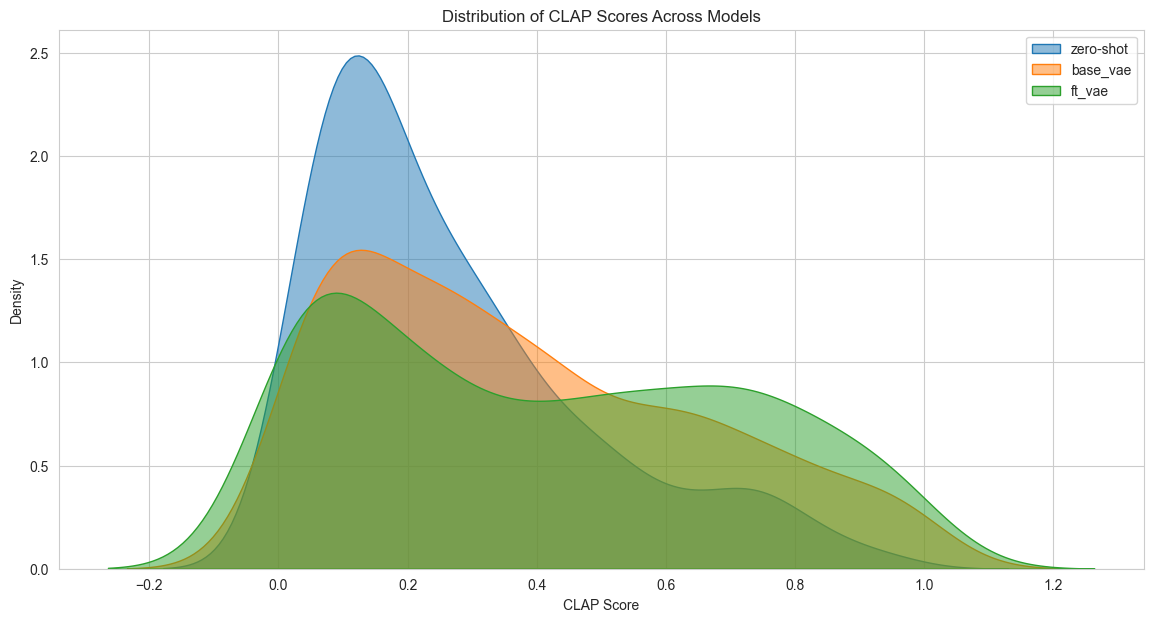

: 

In [ ]:
# Convert to bar plots showing distribution of CLAP scores across models
models = ['zero-shot', 'base_vae', 'ft_vae']
fig, axes = plt.subplots(1, len(models), figsize=(16, 5), sharey=True)

for idx, m in enumerate(models):
    # Create histogram with bins
    axes[idx].hist(predictions[m]['clap_score'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{m}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('CLAP Score')
    if idx == 0:
        axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Alternative: Stacked comparison view
fig, ax = plt.subplots(figsize=(14, 6))

# Create bins for CLAP scores
bins = np.linspace(min([predictions[m]['clap_score'].min() for m in models]),
                    max([predictions[m]['clap_score'].max() for m in models]), 30)

for m in models:
    counts, _ = np.histogram(predictions[m]['clap_score'], bins=bins)
    ax.bar(range(len(counts)), counts, label=m, alpha=0.7, width=0.8)

ax.set_xlabel('CLAP Score Bin')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of CLAP Scores Across Models (Stacked)')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Summary statistics by model
summary_stats = pd.DataFrame({
    m: predictions[m]['clap_score'].describe() for m in models
})
display(summary_stats)

In [ ]:
# Convert to bar plots showing distribution of CLAP scores across models
models = ['ft_vae', 'musiccaps', 'lp-musiccaps']
fig, axes = plt.subplots(1, len(models), figsize=(16, 5), sharey=True)

for idx, m in enumerate(models):
    # Create histogram with bins
    axes[idx].hist(predictions[m]['clap_score'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{m}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('CLAP Score')
    if idx == 0:
        axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Alternative: Stacked comparison view
fig, ax = plt.subplots(figsize=(14, 6))

# Create bins for CLAP scores
bins = np.linspace(min([predictions[m]['clap_score'].min() for m in models]),
                    max([predictions[m]['clap_score'].max() for m in models]), 30)

for m in models:
    counts, _ = np.histogram(predictions[m]['clap_score'], bins=bins)
    ax.bar(range(len(counts)), counts, label=m, alpha=0.7, width=0.8)

ax.set_xlabel('CLAP Score Bin')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of CLAP Scores Across Models (Stacked)')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Summary statistics by model
summary_stats = pd.DataFrame({
    m: predictions[m]['clap_score'].describe() for m in models
})
display(summary_stats)